In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import json
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
from matplotlib.lines import Line2D
import numpy as np

import atlas_mpl_style as ampl
ampl.use_atlas_style(usetex=True)
ampl.set_color_cycle("Paper", 6)

dict_keys(['bins', 'Bkg', 'GG_qSq_1500_700', 'GG_qqN1_1500_1000', 'TT_tN1_1500_1000', 'SqSq_TV_2000_1000', 'SqSq_qN1_2000_1000'])


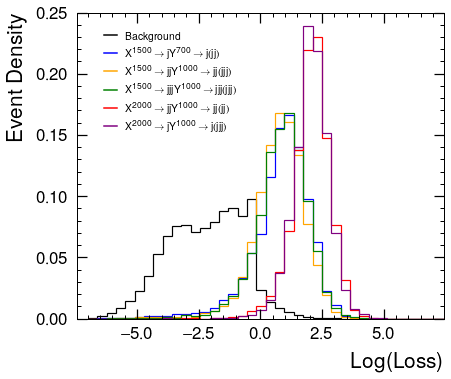

In [18]:
# load the json
inFile = "/Users/anthonybadea/Documents/ATLAS/Pheno/unsupervised-search-paper/histdump.json"
with open(inFile, "r") as f:
    dic = json.load(f)
    print(dic["loss_plot"].keys())

# pick up the bins and the y
bins = dic['loss_plot']['bins']
binW = bins[1]-bins[0]

# make plot
fig = plt.figure(figsize=(6, 5))
ax = plt.axes([0.1, 0.1, 0.85, 0.85])

lw=1.2
rasterized = False

# to plot precomputed bins
ax.hist(bins[:-1], 
    bins, 
    weights=np.array(dic['loss_plot']['Bkg'])*binW,
    alpha=1.0, 
    lw=lw,
    histtype="step",
    label="Background",
    color="black",
    rasterized=rasterized)
ax.hist(bins[:-1], 
    bins, 
    weights=np.array(dic['loss_plot']['GG_qSq_1500_700'])*binW,
    alpha=1.0, 
    lw=lw,
    histtype="step",
    label=r"$X^{1500}\rightarrow jY^{700} \rightarrow j(jj)$",
    color="blue",
    rasterized=rasterized)
ax.hist(bins[:-1], 
    bins, 
    weights=np.array(dic['loss_plot']['GG_qqN1_1500_1000'])*binW,
    alpha=1.0, 
    lw=lw,
    histtype="step",
    label=r"$X^{1500}\rightarrow jjY^{1000} \rightarrow jj(jjj)$",
    color="orange",
    rasterized=rasterized)
ax.hist(bins[:-1], 
    bins, 
    weights=np.array(dic['loss_plot']['TT_tN1_1500_1000'])*binW,
    alpha=1.0, 
    lw=lw,
    histtype="step",
    label=r"$X^{1500}\rightarrow jjjY^{1000} \rightarrow jjj(jjj)$",
    color="green",
    rasterized=rasterized)
ax.hist(bins[:-1], 
    bins, 
    weights=np.array(dic['loss_plot']['SqSq_TV_2000_1000'])*binW,
    alpha=1.0, 
    lw=lw,
    histtype="step",
    label=r"$X^{2000}\rightarrow jjY^{1000} \rightarrow jj(jj)$",
    color="red",
    rasterized=rasterized)
ax.hist(bins[:-1], 
    bins, 
    weights=np.array(dic['loss_plot']['SqSq_qN1_2000_1000'])*binW,
    alpha=1.0, 
    lw=lw,
    histtype="step",
    label=r"$X^{2000}\rightarrow jY^{1000} \rightarrow j(jjj)$",
    color="purple",
    rasterized=rasterized)

# enable legend
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]
ax.legend(new_handles,
          labels,
          title="",
          title_fontsize="13",
          ncol=1,
          framealpha=0.0,
          prop={'size': 10.4},
          bbox_to_anchor=(0.01, 0.47, 0.45, 0.5),
          handlelength=1.25)

# set labels
ax.set_xlabel("Log(Loss)", fontsize=21, labelpad=9, horizontalalignment='right', x=1.0)
ax.set_ylabel("Event Density", fontsize=21, labelpad=9, horizontalalignment='right', y=1.0)

# set limits
ax.set_xlim(-7.45,7.45)
ax.set_ylim(0, 0.25)

# tick params
tick_params_major = {"which"     : "major",
                     "length"    : 10,
                     "width"     : 1.25,
                     "direction" : "in",
                     "right"     : True,
                     "top"       : True,
                     "labelsize" : 17,
                     "pad"       : 8}
tick_params_minor = {"which"     : "minor",
                     "length"    : 4,
                     "width"     : 1,
                     "direction" : "in",
                     "right"     : True,
                     "top"       : True,
                     "labelsize" : 15}

# ax.xaxis.set_minor_locator(AutoMinorLocator(5))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(**tick_params_major)
ax.tick_params(**tick_params_minor)
plt.locator_params(axis='y', nbins=8)

# save
plt.savefig("log_loss.pdf", bbox_inches="tight")